In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader

from ml.train import get_digit_classifier

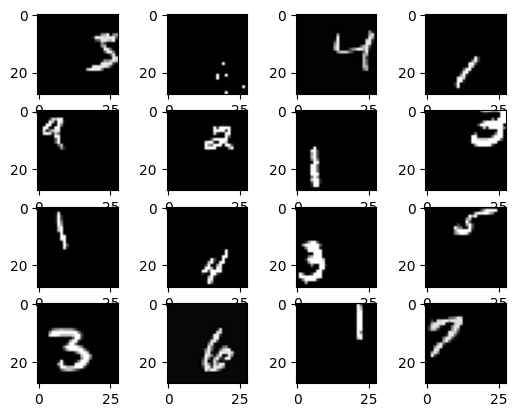

In [2]:
model, train_set, validation_set, _ = get_digit_classifier('cpu')

for i in range(16):
    img, target = train_set[i]
    img = img.permute(1, 2, 0).numpy() * 255

    plt.subplot(4, 4, i+1), plt.imshow(img, 'gray')


In [3]:
checkpoint = torch.load('../models/digitclassifier_best.pth.tar', map_location='cpu')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [4]:
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validation_set, batch_size=batch_size, shuffle=False)

def accuracy(loader: DataLoader):
    running_acc = 0.0

    progress = tqdm(loader)
    for i, (inputs, targets) in enumerate(progress): 
        with torch.no_grad():
            outputs = model(inputs)
        running_acc += (torch.argmax(outputs, dim=1) == targets).sum() / targets.shape[0]
        progress.set_description(f'AvgAccuracy: {running_acc / (i+1):.4f}')
    return running_acc / (i+1)

In [5]:
train_acc = accuracy(train_loader)
print(f'Training accuracy: {train_acc}')

AvgAccuracy: 0.9621: 100%|██████████| 938/938 [00:19<00:00, 47.86it/s]

Training accuracy: 0.9620702266693115


In [6]:
val_acc = accuracy(val_loader)
print(f'Validation accuracy: {val_acc}')

AvgAccuracy: 0.9668: 100%|██████████| 157/157 [00:03<00:00, 49.21it/s]

Validation accuracy: 0.9667595624923706
